# 課題1
3回分の内容を入れています。  
処理してみてください  

**フォルダ構成**  
`try1.ipynb`を新規に作成して取り組んでください
- C:/jupyter/input/try1/*csv
- C:/jupyter/notebook/try1.ipynb

**ファイル一覧**
|ファイル名|説明|
|:-:|:-:|
|experiment1.csv|実験データ1|
|diff_experiment2.csv|実験データ2　追加分実験データ|
|diff_experiment3.csv|実験データ3　追加分実験データ|
|mst_columns.csv|カラム名の入ったデータ|
|mst_material1.csv|材料1の特性データベース|
|mst_material2.csv|材料2の特性データベース|


**想定場面**
>あなたは材料の配合実験およびその生成物の評価を行っています。
>材料の組み合わせ実験を様々なテーマで扱うため  
>材料データベースとして材料の特性データはマスタデータとして  
>水準表とは別で管理しています。
>また実験は一人ではなく、複数人（日本人とアメリカ人）かつ数日にわけて実験をしているため、  
>フォーマットは決まっていますが、水準表は分かれています。
>これらを一つのテーブルで見えるように結合してください。
>


**ゴール**
|   | material1 | material1_add | material2 | material2_add | hardener1 | hardener1_add | additive | additive_add |     score | material1_characteristic1 | material1_characteristic2 | material1_characteristic3 | material2_characteristic1 | material2_characteristic2 |
|---|-----------|----------------|-----------|----------------|-----------|----------------|----------|--------------|-----------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 0 | A         | 15             | X         | 20             | AA        | 0.3            | XX       | 10           | 10.810189 | 0.5                      | 1.0                      | 0.05                     | 0.35                     | 0.8                      |
| 1 | A         | 20             | Y         | 15             | AB        | 0.3            | XX       | 15           | 14.216667 | 0.5                      | 1.0                      | 0.05                     | 0.40                     | 0.6                      |
| 2 | A         | 30             | Z         | 5              | AA        | 0.3            | ZZ       | 10           | 14.988333 | 0.5                      | 1.0                      | 0.05                     | 0.50                     | 0.5                      |
| 3 | B         | 15             | X         | 20             | AB        | 0.3            | ZZ       | 15           | 22.797487 | 1.5                      | 0.7                      | 0.07                     | 0.35                     | 0.8                      |
| 4 | B         | 20             | Y         | 15             | AA        | 0.3            | XX       | 10           | 19.353333 | 1.5                      | 0.7                      | 0.07                     | 0.40                     | 0.6                      |
| 5 | B         | 25             | Z         | 10             | AB        | 0.4            | XX       | 15           | 20.738000 | 1.5                      | 0.7                      | 0.07                     | 0.50                     | 0.5                      |
| 6 | C         | 10             | X         | 25             | AA        | 0.4            | ZZ       | 10           | 14.057617 | 0.1                      | 2.0                      | 0.06                     | 0.35                     | 0.8                      |
| 7 | C         | 15             | X         | 20             | AB        | 0.4            | ZZ       | 15           | 19.367188 | 0.1                      | 2.0                      | 0.06                     | 0.35                     | 0.8                      |
| 8 | C         | 20             | Y         | 15             | AA        | 0.4            | XX       | 10           | 10.300000 | 0.1                      | 2.0                      | 0.06                     | 0.40                     | 0.6                      |
| 9 | C         | 25             | Z         | 10             | AB        | 0.4            | ZZ       | 15           | 13.700000 | 0.1                      | 2.0                      | 0.06                     | 0.50                     | 0.5                      |

## ライブラリのインポート
使用するライブラリを使用可能状態にしてください

In [1]:
import pandas as pd
import os
from glob import glob

pd.set_option('display.max_columns', None)  # 全てのカラムを表示
pd.set_option('display.expand_frame_repr', False)  # 行が多い場合でも折り返さずに表示
pd.set_option('display.max_rows', 10)  # 表示する行数を制限

In [2]:
input_path = "../input/try1_inoue"
output_path = "../output"
encode = "utf-8"

## メインデータの読み込み
`experiment1.csv`を読み込んでください

In [3]:
df_path = os.path.join(input_path,"experiment1.csv")
print(df_path)
df = pd.read_csv(df_path,encoding=encode,header=None)

../input/try1_inoue\experiment1.csv


In [4]:
df

,0,1,2,3,4,5,6,7,8
0,A,15,X,20,AA,0.3,XX,10,10.810189
1,A,20,Y,15,AB,0.3,XX,15,14.216667
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333
3,B,15,X,20,AB,0.3,ZZ,15,22.797487
4,B,20,Y,15,AA,0.3,XX,10,19.353333


## カラムの追加
`mst_columns.csv`を読み込んでください  
データ処理するうえで日本語はよくトラブルの原因になるのでまずは英語で取り込みましょう


In [5]:
mst_c_path=os.path.join(input_path,"mst_columns.csv")
mst_c=pd.read_csv(mst_c_path,encoding=encode)
mst_c

,column_id,en_column,ja_column
0,1,material1,材料1
1,2,material1_add,材料1の量
2,3,material2,材料2
3,4,material2_add,材料2の量
4,5,hardener1,硬化剤
5,6,hardener1_add,硬化剤の量
6,7,additive,添加剤
7,8,additive_add,添加剤の量
8,9,score,目的指数


In [6]:
columns = mst_c.en_column.values
columns

array(['material1', 'material1_add', 'material2', 'material2_add',
       'hardener1', 'hardener1_add', 'additive', 'additive_add', 'score'],
      dtype=object)

In [7]:
len(df.columns) == len(columns)

True

In [8]:
df.columns = columns
df

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score
0,A,15,X,20,AA,0.3,XX,10,10.810189
1,A,20,Y,15,AB,0.3,XX,15,14.216667
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333
3,B,15,X,20,AB,0.3,ZZ,15,22.797487
4,B,20,Y,15,AA,0.3,XX,10,19.353333


## ほかのデータとの結合 
`diff_experiment***.csv`を読み込んでexperiment1に追加してください

In [9]:
diff_files = glob(os.path.join(input_path, "diff*.csv"))
diff_files

['../input/try1_inoue\\diff_experiment2.csv',
 '../input/try1_inoue\\diff_experiment3.csv']

In [10]:
diffs = []
for diff in diff_files:
    df_diff = pd.read_csv(diff,header=None,encoding=encode)
    df_diff.columns = columns
    diffs.append(df_diff)

diff_all = pd.concat(diffs,ignore_index= True)
df_all = pd.concat([df,diff_all],ignore_index=True)


In [11]:
df_all

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score
0,A,15,X,20,AA,0.3,XX,10,10.810189
1,A,20,Y,15,AB,0.3,XX,15,14.216667
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333
3,B,15,X,20,AB,0.3,ZZ,15,22.797487
4,B,20,Y,15,AA,0.3,XX,10,19.353333
5,B,25,Z,10,AB,0.4,XX,15,20.738000
6,C,10,X,25,AA,0.4,ZZ,10,14.057617
7,C,15,X,20,AB,0.4,ZZ,15,19.367188
8,C,20,Y,15,AA,0.4,XX,10,10.300000
9,C,25,Z,10,AB,0.4,ZZ,15,13.700000


## 特性データの追加
追加したデータセットに材料の特性を追加して、テーブル一つに情報を集約しましょう   
`0212.ipynb`を参考にトライしてみてください。

In [12]:
mst1_path = os.path.join(input_path,"mst_material1.csv")
mst2_path = os.path.join(input_path,"mst_material2.csv")
mst1 = pd.read_csv(mst1_path)
mst2 = pd.read_csv(mst2_path)

In [13]:
mst1

,material1,material1_characteristic1,material1_characteristic2,material1_characteristic3
0,A,0.5,1.0,0.05
1,B,1.5,0.7,0.07
2,C,0.1,2.0,0.06


In [14]:
mst2

,material2,material2_characteristic1,material2_characteristic2,Unnamed: 3
0,X,0.35,0.8,NaN
1,Y,0.40,0.6,NaN
2,Z,0.50,0.5,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN


In [15]:
mst2 = mst2.drop(columns=["Unnamed: 3"])

In [16]:
mst2

,material2,material2_characteristic1,material2_characteristic2
0,X,0.35,0.8
1,Y,0.40,0.6
2,Z,0.50,0.5
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN


In [17]:
mst2 = mst2.iloc[:3]
mst2

,material2,material2_characteristic1,material2_characteristic2
0,X,0.35,0.8
1,Y,0.40,0.6
2,Z,0.50,0.5


In [18]:
df_all = df_all.merge(mst1,on="material1",how="left")
df_all

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3
0,A,15,X,20,AA,0.3,XX,10,10.810189,0.5,1.0,0.05
1,A,20,Y,15,AB,0.3,XX,15,14.216667,0.5,1.0,0.05
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333,0.5,1.0,0.05
3,B,15,X,20,AB,0.3,ZZ,15,22.797487,1.5,0.7,0.07
4,B,20,Y,15,AA,0.3,XX,10,19.353333,1.5,0.7,0.07
5,B,25,Z,10,AB,0.4,XX,15,20.738000,1.5,0.7,0.07
6,C,10,X,25,AA,0.4,ZZ,10,14.057617,0.1,2.0,0.06
7,C,15,X,20,AB,0.4,ZZ,15,19.367188,0.1,2.0,0.06
8,C,20,Y,15,AA,0.4,XX,10,10.300000,0.1,2.0,0.06
9,C,25,Z,10,AB,0.4,ZZ,15,13.700000,0.1,2.0,0.06


In [19]:
df_all = df_all.merge(mst2,on="material2",how="left")
df_all

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
0,A,15,X,20,AA,0.3,XX,10,10.810189,0.5,1.0,0.05,0.35,0.8
1,A,20,Y,15,AB,0.3,XX,15,14.216667,0.5,1.0,0.05,0.40,0.6
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333,0.5,1.0,0.05,0.50,0.5
3,B,15,X,20,AB,0.3,ZZ,15,22.797487,1.5,0.7,0.07,0.35,0.8
4,B,20,Y,15,AA,0.3,XX,10,19.353333,1.5,0.7,0.07,0.40,0.6
5,B,25,Z,10,AB,0.4,XX,15,20.738000,1.5,0.7,0.07,0.50,0.5
6,C,10,X,25,AA,0.4,ZZ,10,14.057617,0.1,2.0,0.06,0.35,0.8
7,C,15,X,20,AB,0.4,ZZ,15,19.367188,0.1,2.0,0.06,0.35,0.8
8,C,20,Y,15,AA,0.4,XX,10,10.300000,0.1,2.0,0.06,0.40,0.6
9,C,25,Z,10,AB,0.4,ZZ,15,13.700000,0.1,2.0,0.06,0.50,0.5


最終加工データを保存

In [20]:
csv_name = "try1_output.csv"
save_path = os.path.join(output_path,csv_name)
df_all.to_csv(save_path)

# appendix

## 可視化

In [21]:
import matplotlib.pyplot as plt

In [22]:
df_all.describe()

,material1_add,material2_add,hardener1_add,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,19.500000,15.500000,0.350000,12.500000,16.032881,0.640000,1.310000,0.060000,0.410000,0.650000
std,5.986095,5.986095,0.052705,2.635231,4.267672,0.618601,0.606355,0.008165,0.065828,0.135401
min,10.000000,5.000000,0.300000,10.000000,10.300000,0.100000,0.700000,0.050000,0.350000,0.500000
25%,15.000000,11.250000,0.300000,10.000000,13.789404,0.100000,0.775000,0.052500,0.350000,0.525000
50%,20.000000,15.000000,0.350000,12.500000,14.602500,0.500000,1.000000,0.060000,0.400000,0.600000
75%,23.750000,20.000000,0.400000,15.000000,19.363724,1.250000,2.000000,0.067500,0.475000,0.800000
max,30.000000,25.000000,0.400000,15.000000,22.797487,1.500000,2.000000,0.070000,0.500000,0.800000


In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material1                  10 non-null     object 
 1   material1_add              10 non-null     int64  
 2   material2                  10 non-null     object 
 3   material2_add              10 non-null     int64  
 4   hardener1                  10 non-null     object 
 5   hardener1_add              10 non-null     float64
 6   additive                   10 non-null     object 
 7   additive_add               10 non-null     int64  
 8   score                      10 non-null     float64
 9   material1_characteristic1  10 non-null     float64
 10  material1_characteristic2  10 non-null     float64
 11  material1_characteristic3  10 non-null     float64
 12  material2_characteristic1  10 non-null     float64
 13  material2_characteristic2  10 non-null     float64
dt

C:\Users\4078674\Documents\ml-cheat\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\4078674\Documents\ml-cheat\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\4078674\Documents\ml-cheat\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


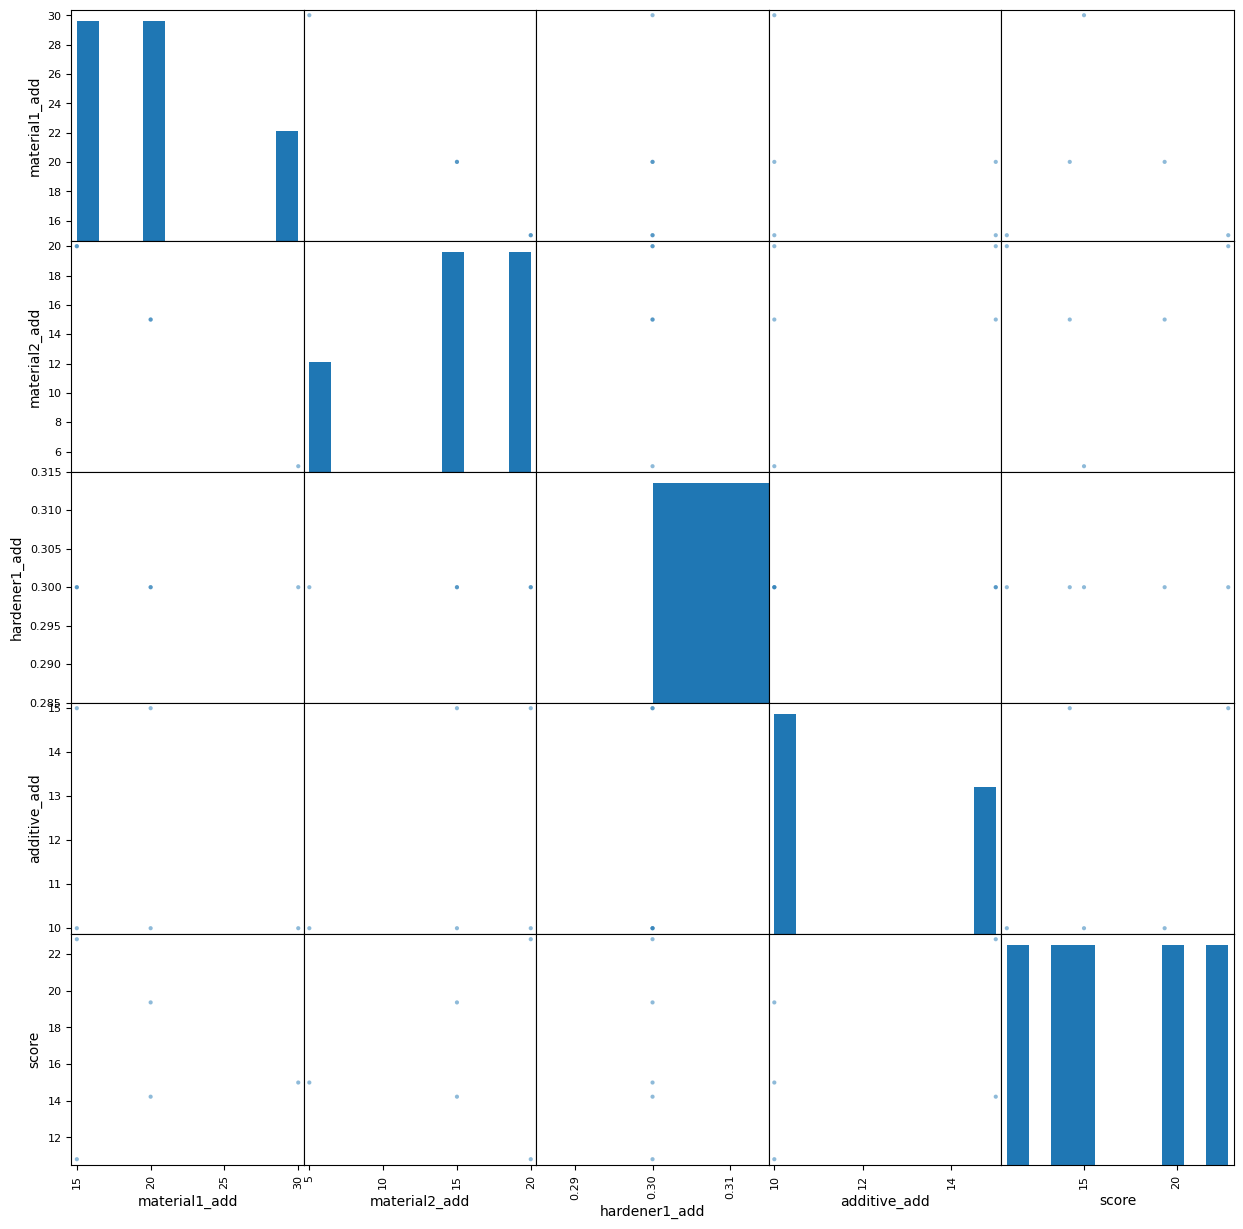

In [24]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

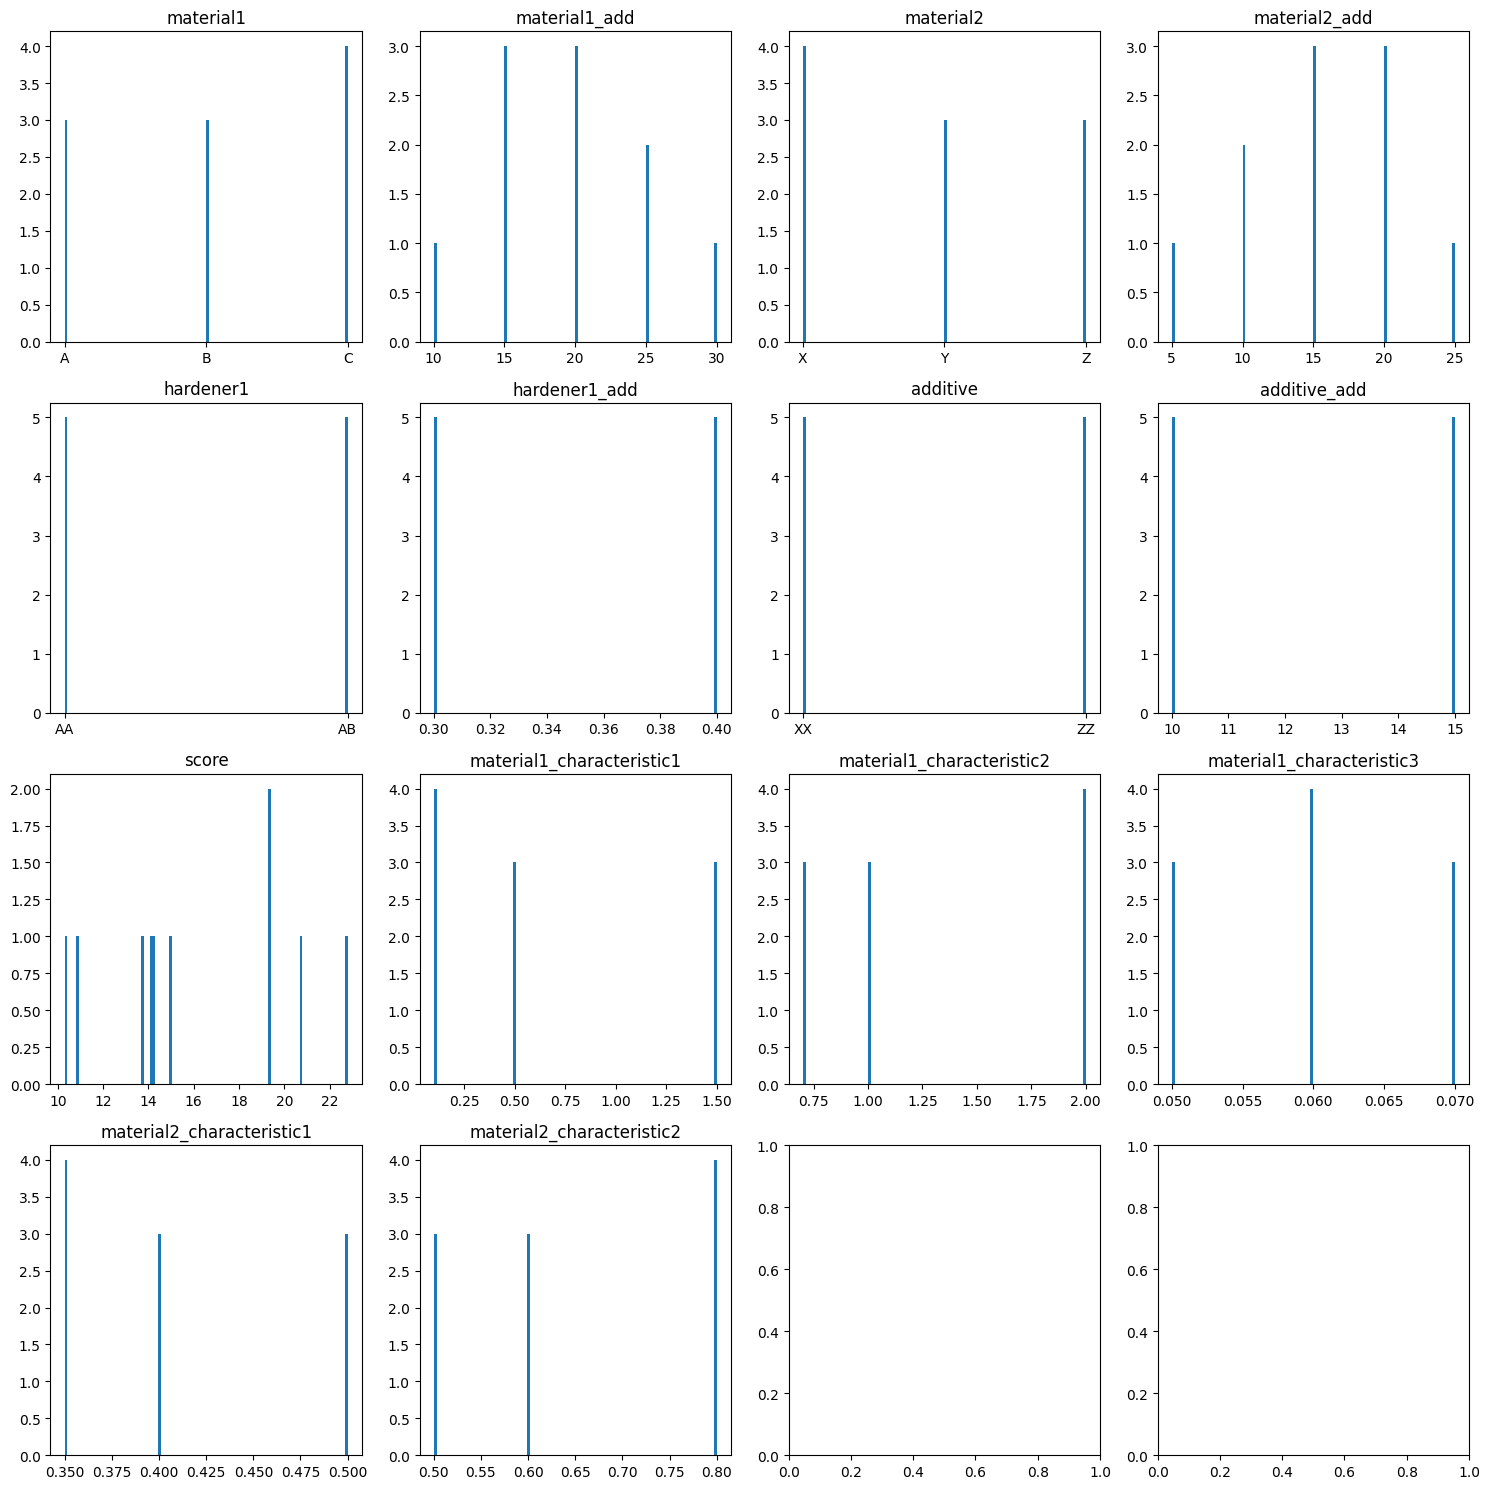

In [25]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=4, ncols=4)
for i, col in enumerate(df_all.columns):
    ax = axes[i//4, i%4]
    ax.hist(df_all[col], bins=100)
    ax.set_title(col)
fig.tight_layout()
plt.show()

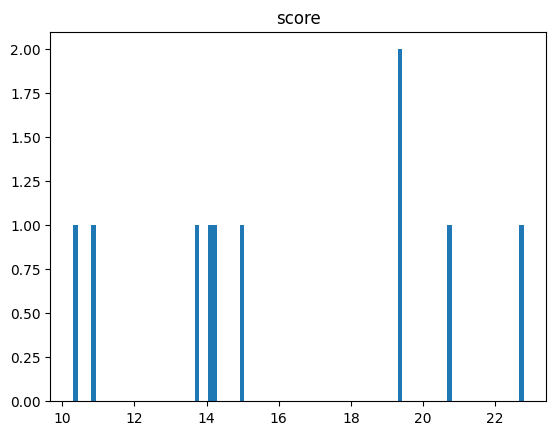

In [26]:
fig, ax = plt.subplots()
ax.hist(df_all["score"], bins=100)
ax.set_title("score")
plt.show()

In [27]:
df_XX = df_all.loc[df_all["additive"]=="XX"]
df_XX

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
0,A,15,X,20,AA,0.3,XX,10,10.810189,0.5,1.0,0.05,0.35,0.8
1,A,20,Y,15,AB,0.3,XX,15,14.216667,0.5,1.0,0.05,0.40,0.6
4,B,20,Y,15,AA,0.3,XX,10,19.353333,1.5,0.7,0.07,0.40,0.6
5,B,25,Z,10,AB,0.4,XX,15,20.738000,1.5,0.7,0.07,0.50,0.5
8,C,20,Y,15,AA,0.4,XX,10,10.300000,0.1,2.0,0.06,0.40,0.6


In [28]:
df_XX = df_XX.sort_values(by='score', ascending=False)
df_XX

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
5,B,25,Z,10,AB,0.4,XX,15,20.738000,1.5,0.7,0.07,0.50,0.5
4,B,20,Y,15,AA,0.3,XX,10,19.353333,1.5,0.7,0.07,0.40,0.6
1,A,20,Y,15,AB,0.3,XX,15,14.216667,0.5,1.0,0.05,0.40,0.6
0,A,15,X,20,AA,0.3,XX,10,10.810189,0.5,1.0,0.05,0.35,0.8
8,C,20,Y,15,AA,0.4,XX,10,10.300000,0.1,2.0,0.06,0.40,0.6


### ヒストグラムについて

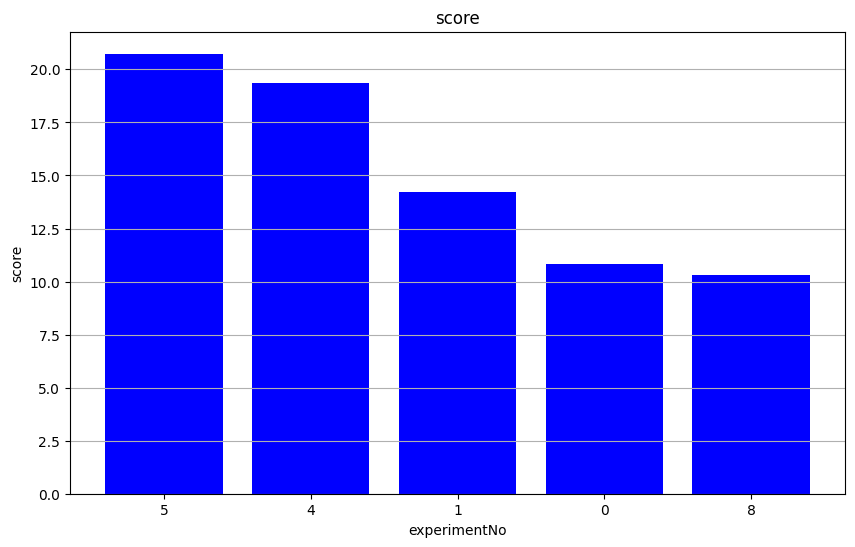

In [29]:
# 設定　何のヒストグラムを作るか
col = "score"

df_XX.index = df_XX.index.astype(str)
plt.figure(figsize=(10,6))
plt.bar(df_XX.index,df_XX[col],color="blue")
plt.xlabel("experimentNo")
plt.ylabel(col)
plt.title(col)
plt.xticks(df_XX.index)
plt.grid(axis='y')
plt.show()

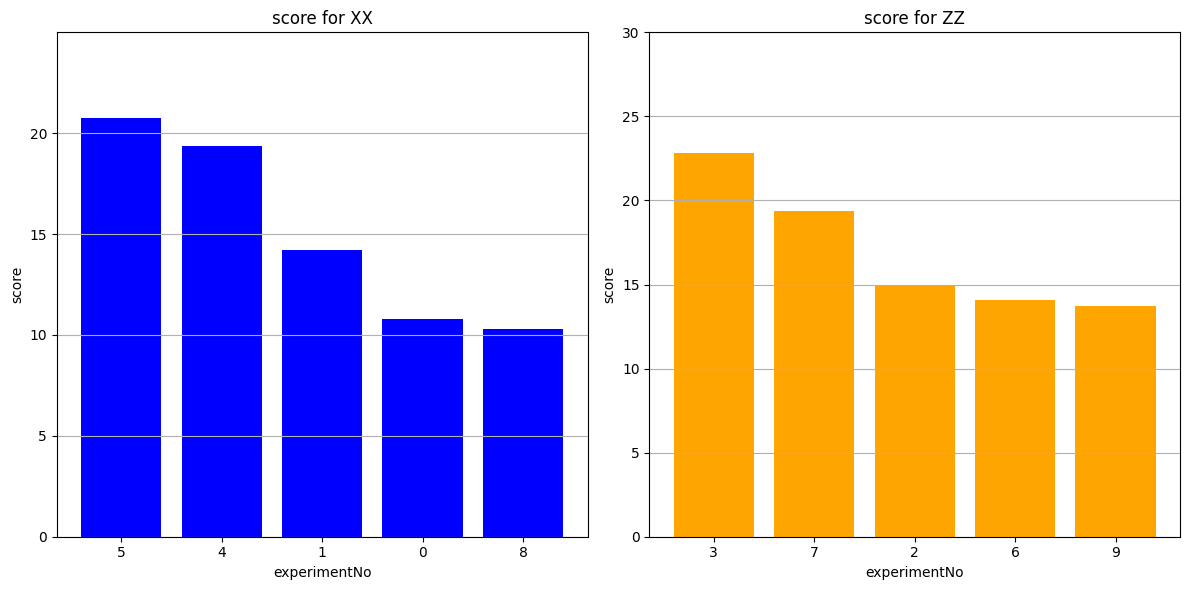

In [30]:
#複数のグラフを同時に出力　かつ　それぞれグラフの設定をする場合

# 設定　何のヒストグラムを作るか
col = "score"

# 対象のadditiveのリスト
additives = ["XX", "ZZ"]

# データフレームを格納するリスト
dfs = []

for additive in additives:
    df_additive = df_all.loc[df_all["additive"] == additive]
    df_additive = df_additive.sort_values(by=col, ascending=False)
    df_additive.index = df_additive.index.astype(str)
    dfs.append(df_additive)

# プロットの準備
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# XXのスコアをプロット
axes[0].bar(dfs[0].index, dfs[0][col], color='blue')
axes[0].set_xlabel("experimentNo")
axes[0].set_ylabel(col)
axes[0].set_title(f"{col} for XX")
axes[0].grid(axis='y')
axes[0].set_ylim(0, 25)  # y軸の上下限値を0から100に設定
axes[0].set_yticks(range(0, 25, 5))  # 刻み幅を10に設定

# YYのスコアをプロット
axes[1].bar(dfs[1].index, dfs[1][col], color='orange')
axes[1].set_xlabel("experimentNo")
axes[1].set_ylabel(col)
axes[1].set_title(f"{col} for ZZ")
axes[1].grid(axis='y')
axes[1].set_ylim(0, 30)  # y軸の上下限値を0から100に設定
axes[1].set_yticks(range(0, 31, 5))  # 刻み幅を10に設定

# プロットの表示
plt.tight_layout()
plt.show()

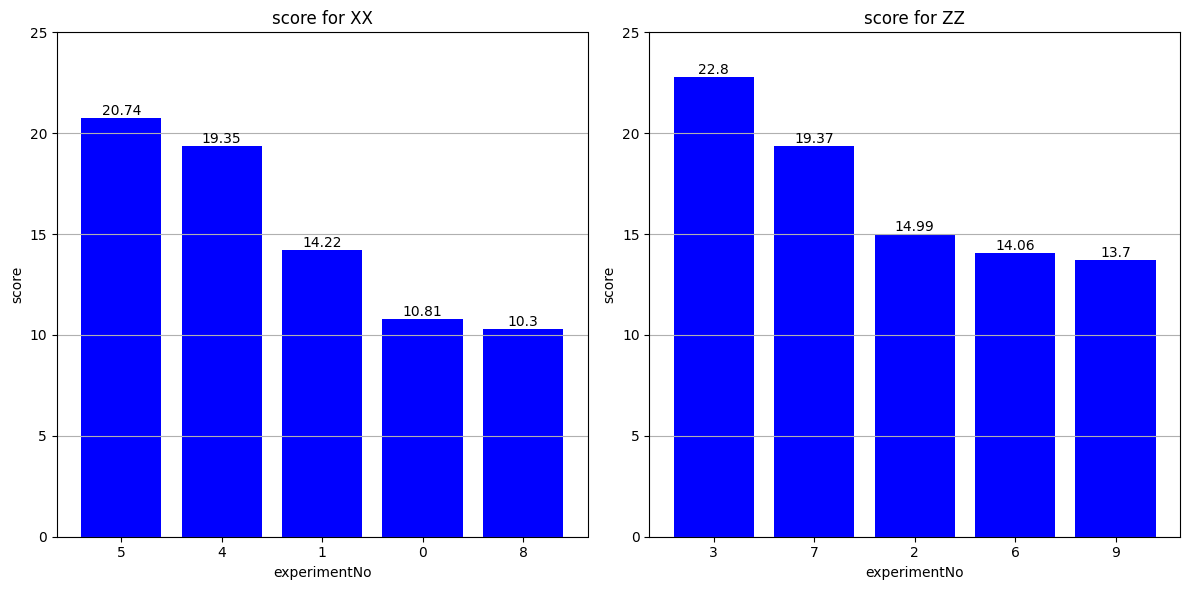

In [31]:
#複数のグラフを同時に出力　かつ　同じグラフを出力する場合

# 設定　何のヒストグラムを作るか
col = "score"
y_max = 25 #y軸の上限値
y_min = 0 #y軸の下限値
y_ticks = 5 #y軸の刻み幅

# 対象のadditiveのリスト

additives = ["XX", "ZZ"]

# データフレームを格納するリスト
dfs = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, additive in enumerate(additives):
    df_additive = df_all.loc[df_all["additive"] == additive]
    df_additive = df_additive.sort_values(by=col, ascending=False)
    df_additive.index = df_additive.index.astype(str)
    dfs.append(df_additive)
    
    # サブプロットにデータを描画
    axes[i].bar(dfs[i].index, dfs[i][col], color='blue')
    axes[i].set_xlabel("experimentNo")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} for {additive}")
    
    axes[i].grid(axis='y')
    axes[i].set_ylim(y_min, y_max)  # y軸の上下限値を0から100に設定
    axes[i].set_yticks(range(y_min, y_max + 1, y_ticks))  # 刻み幅を10に設定
    # データ記入
    bars = axes[i].bar(dfs[i].index, dfs[i][col], color='blue')
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
                      ha='center', va='bottom')  # 数値をバーの上に表示

# プロットの表示
plt.tight_layout()
plt.show()

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
5,B,25,Z,10,AB,0.4,XX,15,20.738000,1.5,0.7,0.07,0.50,0.5
4,B,20,Y,15,AA,0.3,XX,10,19.353333,1.5,0.7,0.07,0.40,0.6
1,A,20,Y,15,AB,0.3,XX,15,14.216667,0.5,1.0,0.05,0.40,0.6
0,A,15,X,20,AA,0.3,XX,10,10.810189,0.5,1.0,0.05,0.35,0.8
8,C,20,Y,15,AA,0.4,XX,10,10.300000,0.1,2.0,0.06,0.40,0.6


,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score,material1_characteristic1,material1_characteristic2,material1_characteristic3,material2_characteristic1,material2_characteristic2
3,B,15,X,20,AB,0.3,ZZ,15,22.797487,1.5,0.7,0.07,0.35,0.8
7,C,15,X,20,AB,0.4,ZZ,15,19.367188,0.1,2.0,0.06,0.35,0.8
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333,0.5,1.0,0.05,0.50,0.5
6,C,10,X,25,AA,0.4,ZZ,10,14.057617,0.1,2.0,0.06,0.35,0.8
9,C,25,Z,10,AB,0.4,ZZ,15,13.700000,0.1,2.0,0.06,0.50,0.5


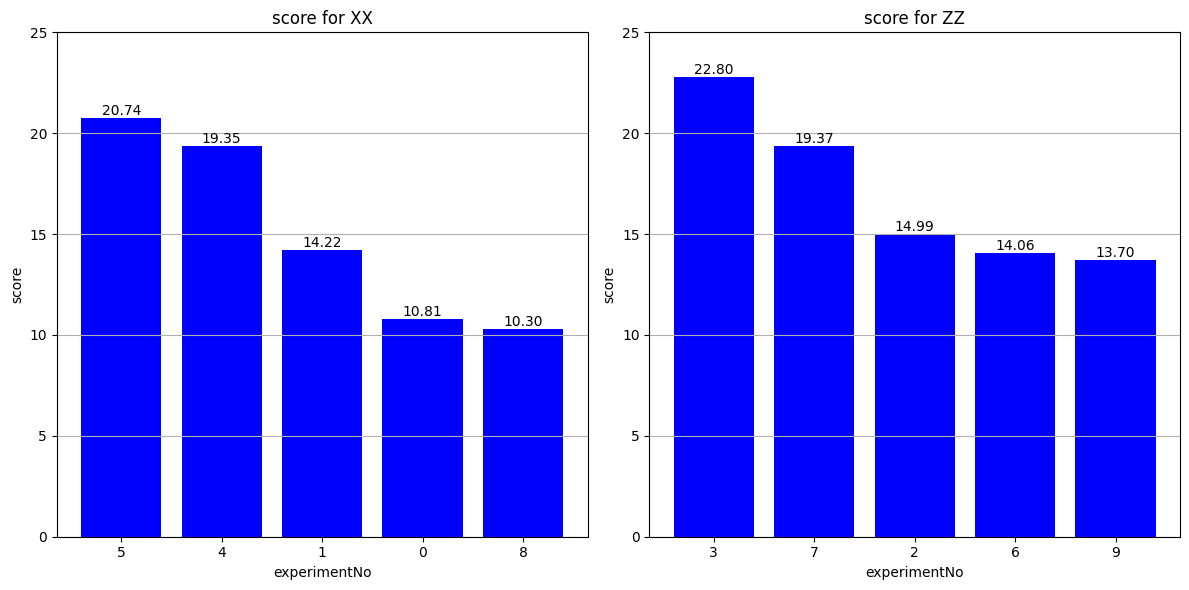

In [32]:
# 変数をさらにfor文の外に出して、汎用性をあげる
from IPython.display import display #`print`より可読性がある
'''
df_allにカラム付きのデータフレームを入れることで、実験データに使用可能
'''
## dfの読み込み(ほかのデータ使う場合)
# path = "C:/***/***/***.csv"
# encode = "utf-8" #"shift-jis"など
# df_all = pd.read_csv(path,encoding=encode)

# 設定
col = "score"
y_max = 25  # y軸の上限値
y_min = 0   # y軸の下限値
y_ticks = 5 # y軸の刻み幅

# 対象のリスト
sub_column = "additive"
subjects = ["XX", "ZZ"]


# データフレームを格納するリスト
dfs = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, sub in enumerate(subjects):
    df_sub = df_all.loc[df_all[sub_column] == sub]
    df_sub = df_sub.sort_values(by=col, ascending=False)
    df_sub.index = df_sub.index.astype(str)
    dfs.append(df_sub)
    display(df_sub) 
    
    # サブプロットにデータを描画
    axes[i].set_xlabel("experimentNo")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} for {sub}")
    
    axes[i].grid(axis='y')
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_yticks(range(y_min, y_max + 1, y_ticks))
    
    # データ記入
    bars = axes[i].bar(dfs[i].index, dfs[i][col], color='blue' 
                       # if i == 0 else 'orange'
                      )
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
                      ha='center', va='bottom')

# プロットの表示
plt.tight_layout()
plt.show()

,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score
5,B,25,Z,10,AB,0.4,XX,15,20.738000
4,B,20,Y,15,AA,0.3,XX,10,19.353333
1,A,20,Y,15,AB,0.3,XX,15,14.216667
0,A,15,X,20,AA,0.3,XX,10,10.810189
8,C,20,Y,15,AA,0.4,XX,10,10.300000


,material1,material1_add,material2,material2_add,hardener1,hardener1_add,additive,additive_add,score
3,B,15,X,20,AB,0.3,ZZ,15,22.797487
7,C,15,X,20,AB,0.4,ZZ,15,19.367188
2,A,30,Z,5,AA,0.3,ZZ,10,14.988333
6,C,10,X,25,AA,0.4,ZZ,10,14.057617
9,C,25,Z,10,AB,0.4,ZZ,15,13.700000


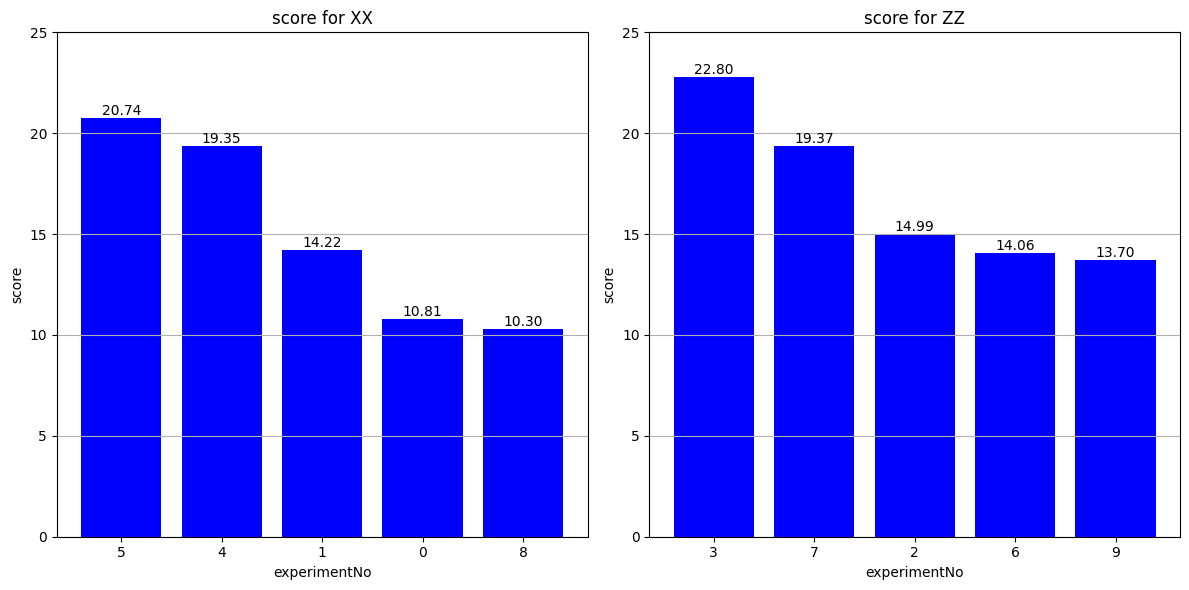

In [33]:
# 変数をさらにfor文の外に出して、汎用性をあげる
from IPython.display import display #`print`より可読性がある
'''
df_allにカラム付きのデータフレームを入れることで、実験データに使用可能
'''
## dfの読み込み(ほかのデータ使う場合)
# path = "C:/***/***/***.csv"
# encode = "utf-8" #"shift-jis"など
# df_all = pd.read_csv(path,encoding=encode)

# 設定
col = "score"
y_max = 25  # y軸の上限値
y_min = 0   # y軸の下限値
y_ticks = 5 # y軸の刻み幅

# 対象のリスト
sub_column = "additive"
subjects = ["XX", "ZZ"]

# 格納するカラムリスト
columns = ['material1',
           'material1_add',
           'material2',
           'material2_add',
           'hardener1',
           'hardener1_add', 
           'additive', 
           'additive_add', 
           'score',
           # 'material1_characteristic1', 
           # 'material1_characteristic2',
           # 'material1_characteristic3', 
           # 'material2_characteristic1',
           # 'material2_characteristic2'
          ]


# データフレームを格納するリスト
dfs = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, sub in enumerate(subjects):
    df_sub = df_all.loc[df_all[sub_column] == sub]
    df_sub = df_sub.sort_values(by=col, ascending=False)
    df_sub.index = df_sub.index.astype(str)
    dfs.append(df_sub)
    df = df_sub[columns]
    display(df)  
    
    # サブプロットにデータを描画
    axes[i].set_xlabel("experimentNo")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} for {sub}")
    
    axes[i].grid(axis='y')
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_yticks(range(y_min, y_max + 1, y_ticks))
    
    # データ記入
    bars = axes[i].bar(dfs[i].index, dfs[i][col], color='blue' 
                       # if i == 0 else 'orange'
                      )
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
                      ha='center', va='bottom')

# プロットの表示
plt.tight_layout()
plt.show()